<a href="https://colab.research.google.com/github/daiisntos/crescimento-evolucao-ESFA/blob/main/analise_crescimentoEz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**
Esta análise tem como objetivo acompanhar o crescimento do meu filho, Ez, ao longo dos primeiros anos de vida, comparando seus dados de estatura com os padrões estabelecidos pela Organização Mundial da Saúde (OMS). Utilizando registros periódicos de altura, aplicaremos técnicas estatísticas simples — como a regressão linear — para identificar tendências de crescimento e realizar estimativas futuras de forma clara e acessível.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [20]:
dados_Ez= pd.read_excel('/content/crescimento_ez (2).xlsx', skiprows = 1)
dados_Ez

,Month,Data,Estatura
0,1,2023-06-06,55.2
1,2,2023-07-14,59.0
2,3,2023-08-28,62.0
3,4,2023-09-28,63.0
4,6,2023-11-01,65.0
5,9,2024-02-01,69.0
6,13,2024-06-04,79.0
7,16,2024-09-18,81.0
8,21,2025-02-13,86.0


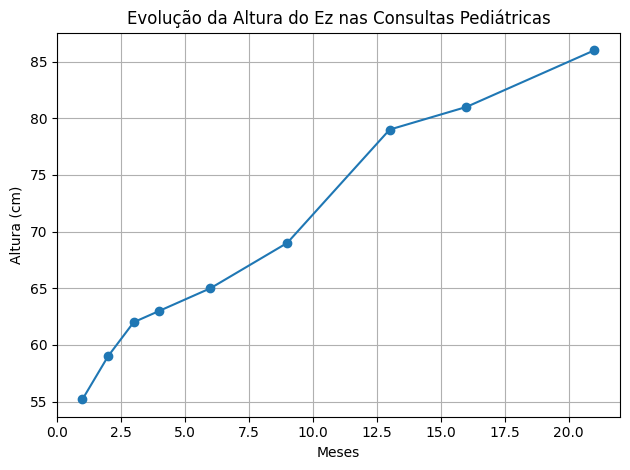

In [40]:
plt.plot(dados_Ez['Month'], dados_Ez['Estatura'], marker='o', linestyle='-')
plt.title('Evolução da Altura do Ez nas Consultas Pediátricas')
plt.xlabel('Meses')
plt.ylabel('Altura (cm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
X = dados_Ez[['Month']]
y = dados_Ez['Estatura']

In [49]:
modelo = LinearRegression()
modelo.fit(X, y)
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = modelo.predict(x_range)
altura_prevista = modelo.predict([[11]])
altura_prevista2 = modelo.predict([[20]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


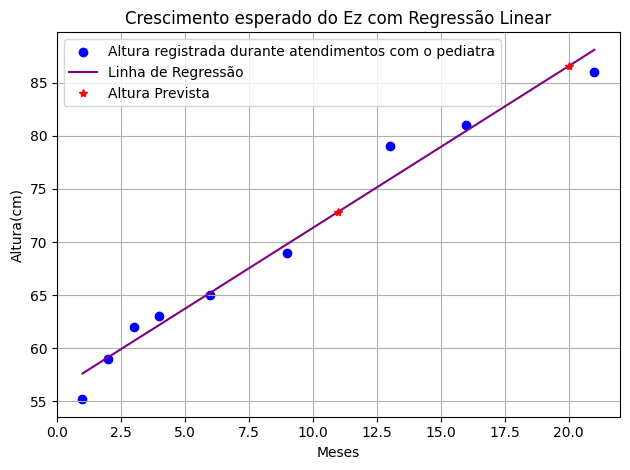

In [53]:
plt.scatter(X, y, color='blue', label='Altura registrada durante atendimentos com o pediatra')
plt.plot(x_range, y_pred, color='purple', label='Linha de Regressão')
plt.plot(11, altura_prevista, '*r')
plt.plot(20, altura_prevista2, '*r', label = 'Altura Prevista')
plt.xlabel('Meses')
plt.ylabel('Altura(cm)')
plt.title('Crescimento esperado do Ez com Regressão Linear')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Análise comparativa com  dados da OMS(Organização Mundial da Saúde)**
Análise comparativa entre a estatura observada e os valores de referência para crianças de até 2 anos, com base em curvas de crescimento infantil

In [9]:
dados_oms = pd.read_excel('/content/tab_lhfa_boys_p_0_2.xlsx')
dados_oms.head()

,Month,L,M,S,SD,P01,P1,P3,P5,P10,P15,P25,P50,P75,P85,P90,P95,P97,P99,P999
0,0,1,49.8842,0.03795,1.8931,44.0,45.5,46.3,46.8,47.5,47.9,48.6,49.9,51.2,51.8,52.3,53.0,53.4,54.3,55.7
1,1,1,54.7244,0.03557,1.9465,48.7,50.2,51.1,51.5,52.2,52.7,53.4,54.7,56.0,56.7,57.2,57.9,58.4,59.3,60.7
2,2,1,58.4249,0.03424,2.0005,52.2,53.8,54.7,55.1,55.9,56.4,57.1,58.4,59.8,60.5,61.0,61.7,62.2,63.1,64.6
3,3,1,61.4292,0.03328,2.0444,55.1,56.7,57.6,58.1,58.8,59.3,60.1,61.4,62.8,63.5,64.0,64.8,65.3,66.2,67.7
4,4,1,63.8860,0.03257,2.0808,57.5,59.0,60.0,60.5,61.2,61.7,62.5,63.9,65.3,66.0,66.6,67.3,67.8,68.7,70.3


In [10]:
dados_oms[['Month', 'P3','M', 'P97',]]

,Month,P3,M,P97
0,0,46.3,49.8842,53.4
1,1,51.1,54.7244,58.4
2,2,54.7,58.4249,62.2
3,3,57.6,61.4292,65.3
4,4,60.0,63.8860,67.8
5,5,61.9,65.9026,69.9
6,6,63.6,67.6236,71.6
7,7,65.1,69.1645,73.2
8,8,66.5,70.5994,74.7
9,9,67.7,71.9687,76.2


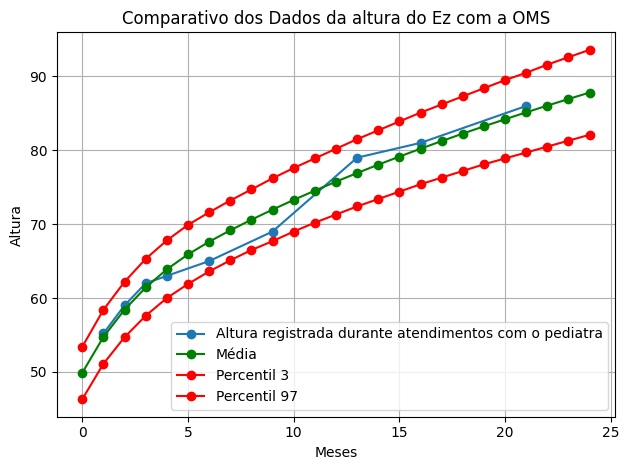

In [51]:
plt.plot(dados_Ez['Month'], dados_Ez['Estatura'], marker='o', linestyle='-')
plt.plot(dados_oms['Month'], dados_oms['M'], marker='o', linestyle='-', color = 'green')
plt.plot(dados_oms['Month'], dados_oms['P3'], marker='o', linestyle='-', color= 'red')
plt.plot(dados_oms['Month'], dados_oms['P97'], marker='o', linestyle='-', color= 'red')
plt.legend(['Altura registrada durante atendimentos com o pediatra', 'Média', 'Percentil 3', 'Percentil 97'])
plt.title('Comparativo dos Dados da altura do Ez com a OMS')
plt.xlabel('Meses')
plt.ylabel('Altura')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Conclusão**
A regressão linear, apesar de ser uma técnica estatística simples, mostrou-se eficaz para acompanhar e estimar o crescimento do Ez ao longo do tempo. O modelo atendeu aos objetivos propostos, oferecendo uma estimativa clara da tendência de estatura, o que pôde ser visualizado na linha de regressão traçada sobre os dados reais.

No gráfico "Comparativo dos Dados da Altura do Ez com a OMS", observamos que, mesmo sem consultas pediátricas mensais — uma vez que, no SUS, os atendimentos geralmente ocorrem a cada 2 a 3 meses ou conforme a disponibilidade —, a estatura do Ez se mantém dentro da faixa considerada adequada para crianças de 0 a 2 anos. Ele acompanha de forma consistente o Percentil 50 (P50), que representa a média esperada para sua faixa etária. Importante destacar que, em nenhum momento, seus dados ficaram abaixo do Percentil 3 (P3) ou acima do Percentil 97 (P97), o que reforça que seu desenvolvimento está dentro dos padrões normais de crescimento infantil.